In [249]:
import json

In [250]:
import json

with open("/media/mlfavorfit/sda/template_recommend_dataset/cluster_features_split/train_datas.json", mode="r") as f:
    train_colors = list(json.load(f).values())
with open("/media/mlfavorfit/sda/template_recommend_dataset/cluster_features_split/val_datas.json", mode="r") as f:
    val_colors = list(json.load(f).values())
with open("/media/mlfavorfit/sda/template_recommend_dataset/cluster_features_split/train_labels.json", mode="r") as f:
    train_colors_2 = list(json.load(f).values())
with open("/media/mlfavorfit/sda/template_recommend_dataset/cluster_features_split/val_labels.json", mode="r") as f:
    val_colors_2 = list(json.load(f).values())

In [251]:
with open("./main_color.json", mode="r")as f:
    main_colors = [cur[0] for cur in json.load(f)]

In [330]:
# label_colors = [cur[0] for cur in train_colors_2 if len(cur) == 2]+[cur[0] for cur in val_colors_2 if len(cur) == 2]
label_colors = [cur[0] for cur in train_colors_2 if len(cur) == 2]

In [346]:
with open("/media/mlfavorfit/sda/template_recommend_dataset/cluster_features_split/val_labels.json", mode="r") as f:
    json_like = json.load(f)
    train_colors = [[key,json_like[key]] for key in json_like if len(json_like[key]) == 2]

In [347]:
label_colors = [cur[1][0] for cur in train_colors]

In [348]:
import numpy as np
label_colors_np = np.array(label_colors).reshape(-1,3)+1
main_colors_np = np.array(main_colors)+1

sim_arr = np.matmul(label_colors_np / np.linalg.norm(label_colors_np, axis=1)[:,None],
                    (main_colors_np / np.linalg.norm(main_colors_np, axis=1)[:,None]).T)
quantized_colors = np.argmax(sim_arr, axis=1).reshape(-1,4).tolist()

In [349]:
quantized_colors[0]

[81, 127, 73, 121]

In [350]:
new_dict = {}
for idx, cur in enumerate(train_colors):
    features = cur[1] + [quantized_colors[idx]]
    new_dict[cur[0]] = features

In [351]:
with open("./val_label_quant.json", mode="w")as f:
    json.dump(new_dict, f, indent=4)

In [253]:
import numpy as np

In [254]:
label_colors_np = np.array(label_colors).reshape(-1,3)+1
main_colors_np = np.array(main_colors)+1

In [255]:
sim_arr = np.matmul(label_colors_np / np.linalg.norm(label_colors_np, axis=1)[:,None],
                    (main_colors_np / np.linalg.norm(main_colors_np, axis=1)[:,None]).T)

In [256]:
np.sum(np.isnan(sim_arr))

0

In [257]:
quantized_colors = np.argmax(sim_arr, axis=1)

In [260]:
len(label_colors)

69976

In [262]:
len(quantized_colors.reshape(-1,4))

69976

(array([1.1500e+02, 1.6300e+02, 2.5300e+02, 3.9600e+02, 1.8800e+02,
        1.9500e+02, 1.6000e+01, 1.1700e+02, 8.7900e+02, 6.6000e+01,
        1.1200e+02, 1.0100e+02, 4.0500e+02, 5.3000e+01, 2.5300e+02,
        3.5000e+01, 7.1000e+01, 1.1800e+02, 1.6100e+02, 1.9900e+02,
        1.2900e+02, 4.0000e+00, 7.5000e+01, 1.3300e+02, 1.3700e+02,
        3.3000e+01, 9.6000e+01, 1.0100e+02, 1.4800e+02, 5.6000e+02,
        5.6700e+02, 2.6500e+02, 8.6000e+01, 0.0000e+00, 9.0000e+00,
        4.1660e+03, 9.0000e+00, 4.6200e+02, 9.1000e+01, 2.7000e+01,
        1.1400e+02, 4.3800e+02, 2.0900e+02, 0.0000e+00, 1.9300e+02,
        3.1600e+02, 6.1000e+01, 1.4000e+01, 3.7000e+01, 5.8000e+01,
        4.8000e+01, 1.3000e+01, 1.9000e+01, 6.0500e+02, 2.1000e+01,
        4.5500e+02, 2.7200e+02, 9.9000e+02, 2.3800e+02, 1.1100e+02,
        5.8700e+02, 3.9800e+02, 2.9000e+01, 1.3000e+01, 1.2330e+03,
        2.3800e+02, 3.4000e+01, 2.4000e+02, 9.9000e+01, 1.1000e+01,
        3.8600e+02, 1.4600e+02, 7.1100e+02, 2.43

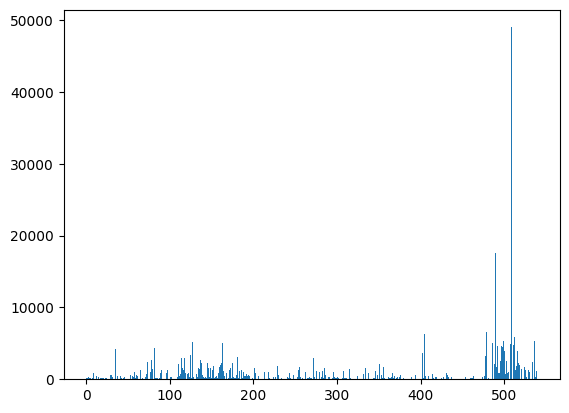

In [158]:
import matplotlib.pyplot as plt

plt.hist(quantized_colors, bins=range(0,540))

In [190]:
from collections import Counter

counter = Counter(quantized_colors)
counter

Counter({508: 48995,
         489: 17619,
         267: 7418,
         478: 6650,
         404: 6258,
         512: 5865,
         535: 5315,
         498: 5267,
         127: 5180,
         162: 5074,
         485: 5011,
         507: 4842,
         510: 4838,
         462: 4783,
         505: 4741,
         496: 4650,
         491: 4636,
         497: 4438,
         81: 4358,
         35: 4166,
         500: 3969,
         515: 3872,
         402: 3713,
         124: 3365,
         536: 3257,
         477: 3196,
         180: 3036,
         117: 3011,
         113: 2935,
         271: 2917,
         136: 2689,
         78: 2651,
         495: 2597,
         502: 2488,
         73: 2437,
         144: 2417,
         533: 2380,
         516: 2334,
         137: 2318,
         120: 2313,
         145: 2299,
         499: 2221,
         174: 2216,
         161: 2210,
         89: 2187,
         517: 2175,
         110: 2159,
         350: 2148,
         488: 2129,
         518: 1997,
   

In [202]:
np.where(quantized_colors == 124)

(array([    65,    328,    383, ..., 399827, 399829, 399861]),)

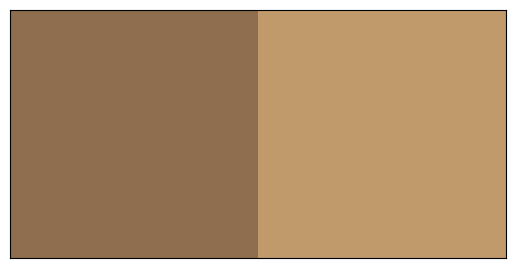

In [206]:
from utils.colors_utils import visualize_rgb_colors

visualize_rgb_colors([label_colors_np[399861]-1,main_colors_np[124]-1])

In [246]:
weight_pair = np.array(sorted(counter.items(), key= lambda x:x[1], reverse=True))
weight_key, counts = weight_pair[:,0], weight_pair[:,1]
weights = np.mean(counts) / counts
weights_map = dict(zip(weight_key.astype(str), weights))

In [247]:
with open("./main_color_weights_map.json", mode="w") as f:
    json.dump(weights_map, f, indent=4)